# Employee Attrition Prediction Project

Understanding the factors that contribute to employee attrition and being able to predict which employees are at risk of leaving is vital for implementing proactive retention strategies. The goal of this project is to develop a predictive model that accurately identifies employees who are likely to leave the company. This model will enable the HR department to take timely actions to improve employee satisfaction and reduce attrition rates, ultimately leading to a more stable and productive workforce.

In [ ]:
# importing libraries

import numpy as np
import pandas as pd 


In [ ]:
# load first dataset as df1

df1 = pd.read_csv('./data/HR_Attrition Data.csv')

# viewing first 5 rows 
df1.head()


,Employee No.,Gender,Education,Education Field,Job Role,Department,Age group,Work Location,Attrition,Attrition Date,...,Environment Satisfaction,Attrition Count,Job Involvement,Job Satisfaction,Monthly Income,Percent Salary Hike,Performance Rating,Placeholder,Relationship Satisfaction,Work Life Balance
0,E_1,Female,Associates Degree,Life Sciences,Sales Executive,Sales,35-44,Banglore,Yes,4/30/2022,...,2,1.0,3,4,5993,11,3,0,1,1
1,E_2,Male,High School,Life Sciences,Research Scientist,R & D,45-55,Hydrabad,No,NaN,...,3,NaN,2,2,5130,23,4,0,4,3
2,E_4,Male,Associates Degree,Other,Laboratory Technician,R & D,35-44,Noida,Yes,5/3/2022,...,4,1.0,2,3,2090,15,3,0,2,3
3,E_5,Female,Master's Degree,Life Sciences,Research Scientist,R & D,25-34,Pune,No,NaN,...,4,NaN,3,3,2909,11,3,0,3,3
4,E_7,Male,High School,Medical,Laboratory Technician,R & D,25-34,Mumbai,No,NaN,...,1,NaN,3,2,3468,12,3,0,4,3


In [3]:
# checking for missing values and data types
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee No.               1470 non-null   object 
 1   Gender                     1470 non-null   object 
 2   Education                  1470 non-null   object 
 3   Education Field            1470 non-null   object 
 4   Job Role                   1470 non-null   object 
 5   Department                 1470 non-null   object 
 6   Age group                  1470 non-null   object 
 7   Work Location              1470 non-null   object 
 8   Attrition                  1470 non-null   object 
 9   Attrition Date             237 non-null    object 
 10  Attrition Label            1470 non-null   object 
 11  Dynamic Date               237 non-null    object 
 12  Age                        1470 non-null   int64  
 13  Attrition.1                1470 non-null   int64

In [4]:
# loading second dataset 
df2 = pd.read_csv('./HR_New_data.csv')

df2.head()

,emp_id,last_evaluation,number_project,average_montly_hours,Work_accident,promotion_last_5years
0,E_1,0.53,2,157,0,0
1,E_4,0.86,5,262,0,0
2,E_19,0.88,7,272,0,0
3,E_27,0.87,5,223,0,0
4,E_31,0.52,2,159,0,0


In [6]:
# checking for missing values and data types 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   emp_id                 1470 non-null   object 
 1   last_evaluation        1470 non-null   float64
 2   number_project         1470 non-null   int64  
 3   average_montly_hours   1470 non-null   int64  
 4   Work_accident          1470 non-null   int64  
 5   promotion_last_5years  1470 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 69.0+ KB


In [ ]:
# joining the datasets 
df = pd.merge(left=df1, right=df2, left_on="Employee No.", right_on="emp_id")
df.head()

,Employee No.,Gender,Education,Education Field,Job Role,Department,Age group,Work Location,Attrition,Attrition Date,...,Performance Rating,Placeholder,Relationship Satisfaction,Work Life Balance,emp_id,last_evaluation,number_project,average_montly_hours,Work_accident,promotion_last_5years
0,E_1,Female,Associates Degree,Life Sciences,Sales Executive,Sales,35-44,Banglore,Yes,4/30/2022,...,3,0,1,1,E_1,0.53,2,157,0,0
1,E_2,Male,High School,Life Sciences,Research Scientist,R & D,45-55,Hydrabad,No,NaN,...,4,0,4,3,E_2,0.74,4,215,0,0
2,E_4,Male,Associates Degree,Other,Laboratory Technician,R & D,35-44,Noida,Yes,5/3/2022,...,3,0,2,3,E_4,0.86,5,262,0,0
3,E_5,Female,Master's Degree,Life Sciences,Research Scientist,R & D,25-34,Pune,No,NaN,...,3,0,3,3,E_5,0.67,2,202,0,0
4,E_7,Male,High School,Medical,Laboratory Technician,R & D,25-34,Mumbai,No,NaN,...,3,0,4,3,E_7,0.69,5,193,0,0


In [29]:
# saving merged dataset
df.to_csv('./data/merged_dataset.csv', index=False)

In [8]:
df.columns

Index(['Employee No.', 'Gender', 'Education', 'Education Field', 'Job Role',
       'Department', 'Age group', 'Work Location', 'Attrition',
       'Attrition Date', 'Attrition Label', 'Dynamic Date', 'Age',
       'Attrition.1', 'Avg. Satisfaction Score', 'Employee Count',
       'Environment Satisfaction', 'Attrition Count', 'Job Involvement',
       'Job Satisfaction', 'Monthly Income', 'Percent Salary Hike',
       'Performance Rating', 'Placeholder', 'Relationship Satisfaction',
       'Work Life Balance', 'emp_id', 'last_evaluation', 'number_project',
       'average_montly_hours', 'Work_accident', 'promotion_last_5years'],
      dtype='object')

## Exploratory Data Analysis (EDA)

In [9]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

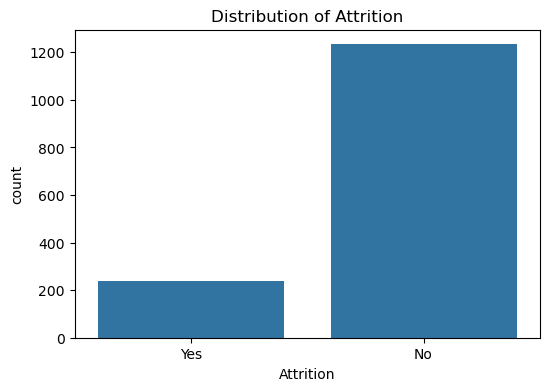

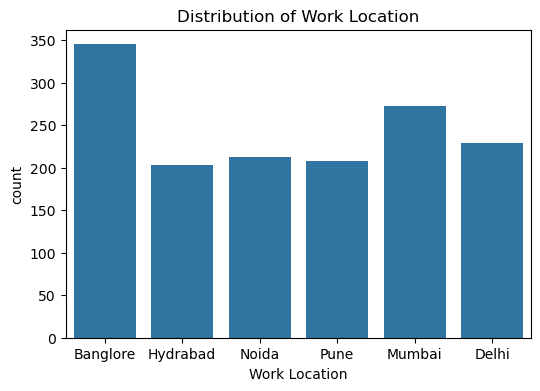

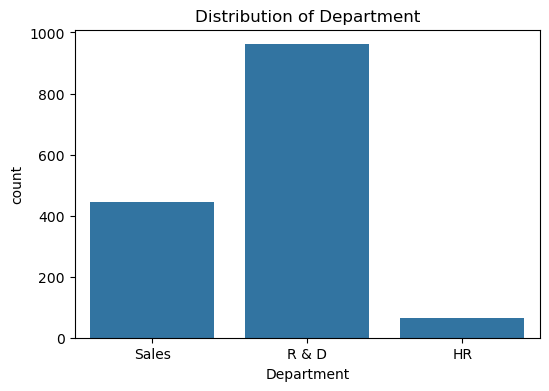

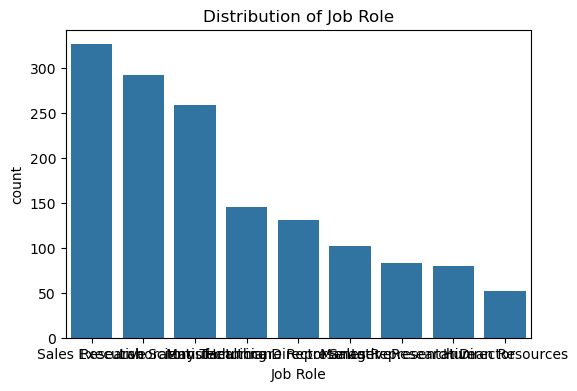

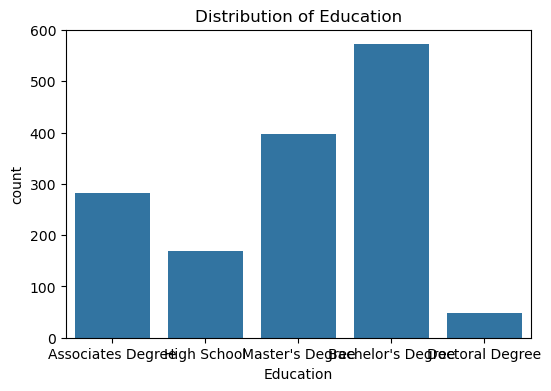

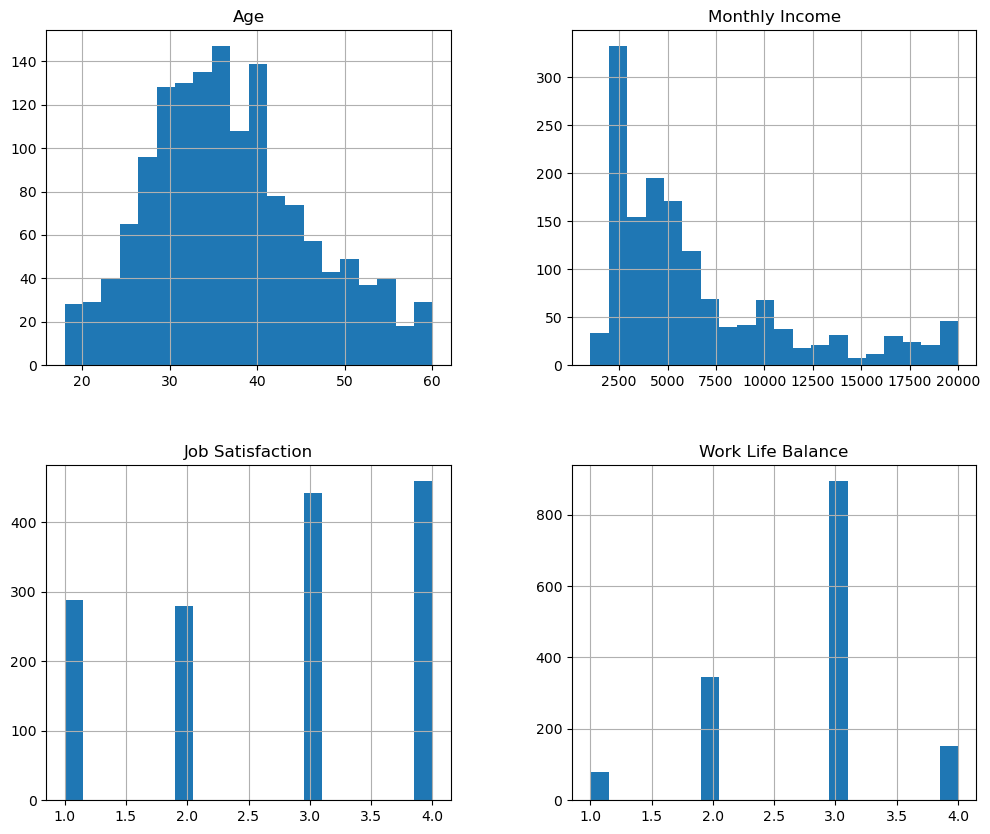

In [ ]:
# importing visualizaiton libraries 
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distiribution of Attrition (target variable)
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', data=df)
plt.title('Distribution of Attrition')
plt.show()

# Plot distribution of a few key categorical variables
categorical_cols = ['Work Location', 'Department', 'Job Role', 'Education']
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Histograms for numerical features
numerical_cols = ['Age', 'Monthly Income', 'Job Satisfaction', 'Work Life Balance']
df[numerical_cols].hist(bins=20, figsize=(12, 10), layout=(2, 2))
plt.show()

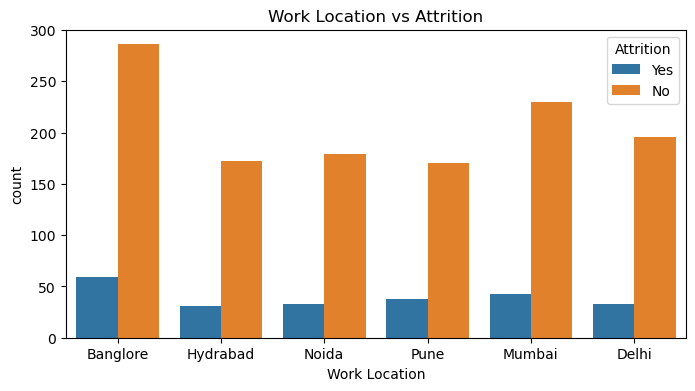

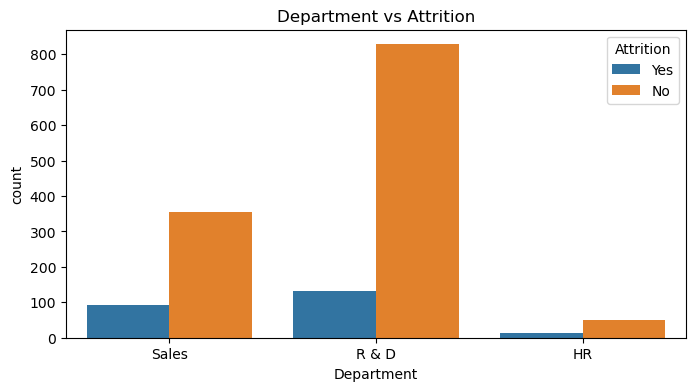

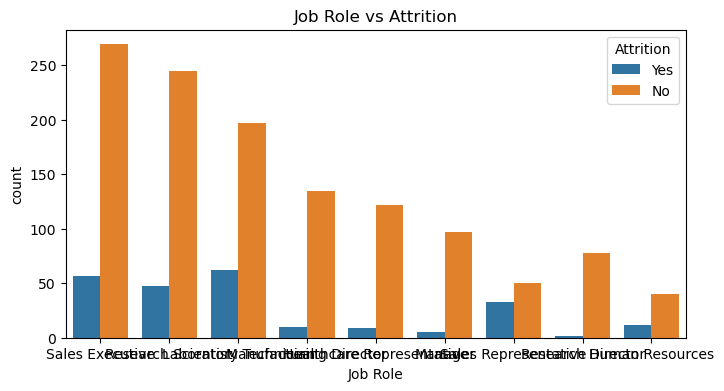

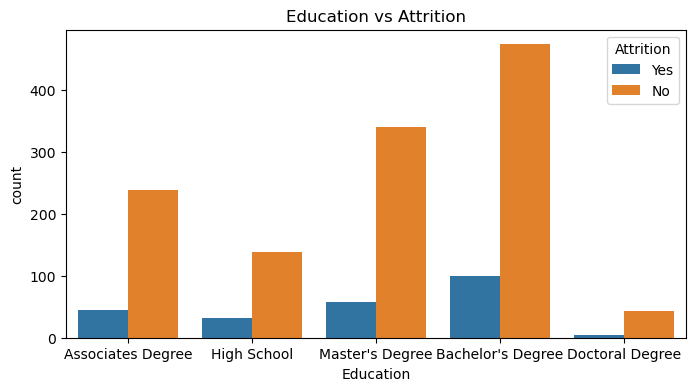

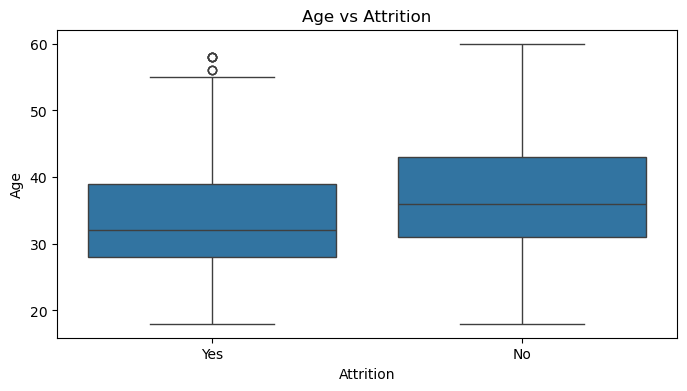

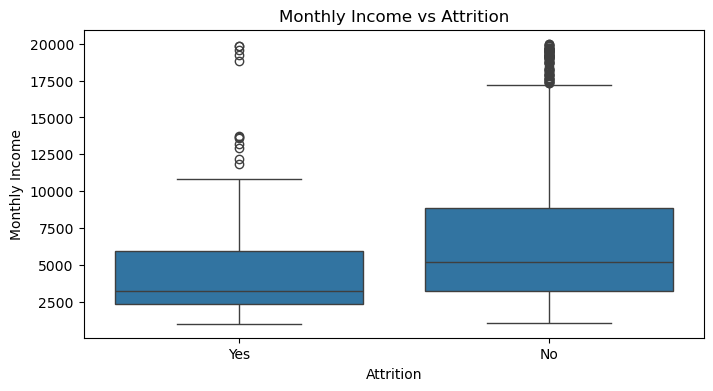

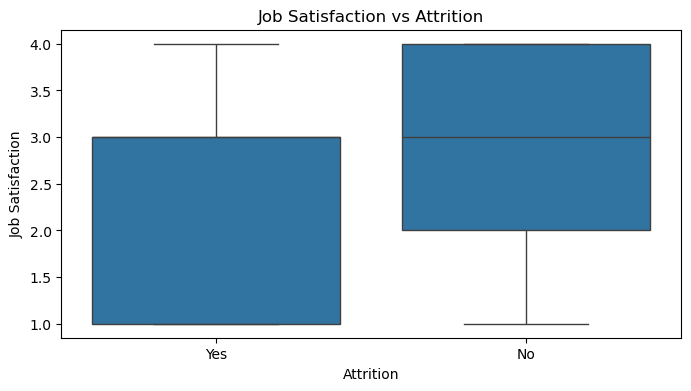

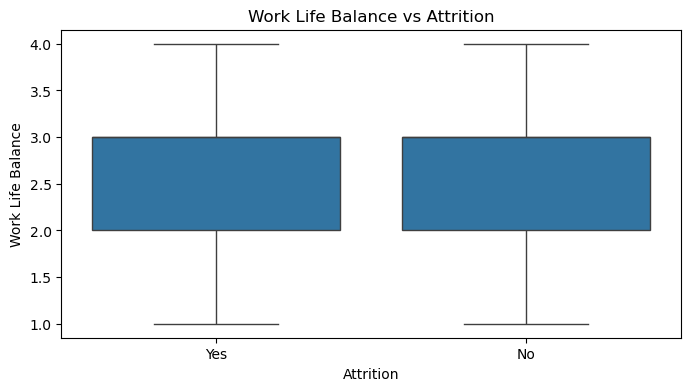

In [11]:
# Categorical vs Target (Attrition)
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue='Attrition', data=df)
    plt.title(f'{col} vs Attrition')
    plt.show()

# Boxplots for numerical features vs Attrition
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Attrition', y=col, data=df)
    plt.title(f'{col} vs Attrition')
    plt.show()

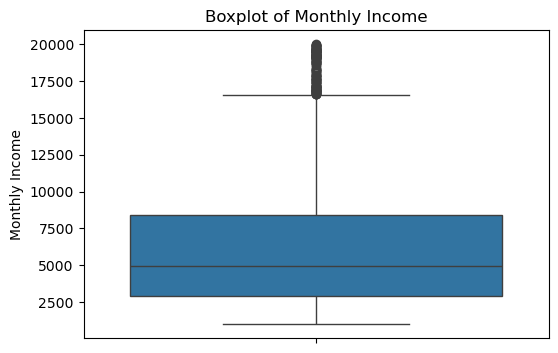

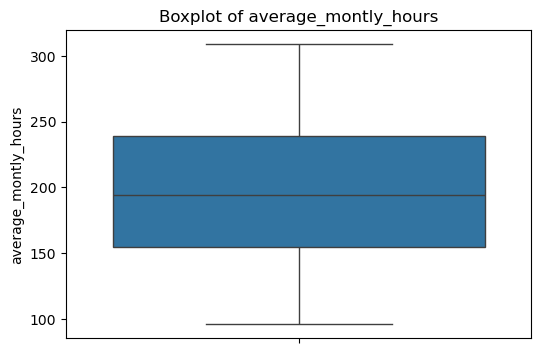

In [12]:
# Detecting outliers using boxplots
for col in ['Monthly Income', 'average_montly_hours']:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

### Data Preprocessing/ Data Cleaning / Data Wrangling

In [13]:
# Check Missing Values
df.isna().sum()

Employee No.                    0
Gender                          0
Education                       0
Education Field                 0
Job Role                        0
Department                      0
Age group                       0
Work Location                   0
Attrition                       0
Attrition Date               1233
Attrition Label                 0
Dynamic Date                 1233
Age                             0
Attrition.1                     0
Avg. Satisfaction Score         0
Employee Count                  0
Environment Satisfaction        0
Attrition Count              1233
Job Involvement                 0
Job Satisfaction                0
Monthly Income                  0
Percent Salary Hike             0
Performance Rating              0
Placeholder                     0
Relationship Satisfaction       0
Work Life Balance               0
emp_id                          0
last_evaluation                 0
number_project                  0
average_montly

In [ ]:
df = df[['Gender', 'Education', 'Education Field', 'Job Role',
    'Department', 'Work Location','Attrition', 'Age',
    'Avg. Satisfaction Score',
    'Environment Satisfaction', 'Job Involvement',
    'Job Satisfaction', 'Monthly Income', 'Percent Salary Hike',
    'Performance Rating', 'Relationship Satisfaction',
    'Work Life Balance','last_evaluation', 'number_project',
    'average_montly_hours', 'Work_accident', 'promotion_last_5years']]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     1470 non-null   object 
 1   Education                  1470 non-null   object 
 2   Education Field            1470 non-null   object 
 3   Job Role                   1470 non-null   object 
 4   Department                 1470 non-null   object 
 5   Work Location              1470 non-null   object 
 6   Attrition                  1470 non-null   object 
 7   Age                        1470 non-null   int64  
 8   Avg. Satisfaction Score    1470 non-null   float64
 9   Environment Satisfaction   1470 non-null   int64  
 10  Job Involvement            1470 non-null   int64  
 11  Job Satisfaction           1470 non-null   int64  
 12  Monthly Income             1470 non-null   int64  
 13  Percent Salary Hike        1470 non-null   int64

In [16]:
df.head()

,Gender,Education,Education Field,Job Role,Department,Work Location,Attrition,Age,Avg. Satisfaction Score,Environment Satisfaction,...,Monthly Income,Percent Salary Hike,Performance Rating,Relationship Satisfaction,Work Life Balance,last_evaluation,number_project,average_montly_hours,Work_accident,promotion_last_5years
0,Female,Associates Degree,Life Sciences,Sales Executive,Sales,Banglore,Yes,41,2.2,2,...,5993,11,3,1,1,0.53,2,157,0,0
1,Male,High School,Life Sciences,Research Scientist,R & D,Hydrabad,No,49,2.8,3,...,5130,23,4,4,3,0.74,4,215,0,0
2,Male,Associates Degree,Other,Laboratory Technician,R & D,Noida,Yes,37,2.8,4,...,2090,15,3,2,3,0.86,5,262,0,0
3,Female,Master's Degree,Life Sciences,Research Scientist,R & D,Pune,No,33,3.2,4,...,2909,11,3,3,3,0.67,2,202,0,0
4,Male,High School,Medical,Laboratory Technician,R & D,Mumbai,No,27,2.6,1,...,3468,12,3,4,3,0.69,5,193,0,0


In [ ]:
# Handling missing values 
# Option 1: Drop rows with missing values
df.dropna(inplace=True)


### Encoding Categorical Variables

In [18]:
# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['Gender', 'Education', 'Education Field', 'Job Role', 'Department', 'Work Location'], drop_first=True)

In [19]:
# Convert binary columns to 0 and 1
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Attrition                         1470 non-null   int64  
 1   Age                               1470 non-null   int64  
 2   Avg. Satisfaction Score           1470 non-null   float64
 3   Environment Satisfaction          1470 non-null   int64  
 4   Job Involvement                   1470 non-null   int64  
 5   Job Satisfaction                  1470 non-null   int64  
 6   Monthly Income                    1470 non-null   int64  
 7   Percent Salary Hike               1470 non-null   int64  
 8   Performance Rating                1470 non-null   int64  
 9   Relationship Satisfaction         1470 non-null   int64  
 10  Work Life Balance                 1470 non-null   int64  
 11  last_evaluation                   1470 non-null   float64
 12  number

In [21]:
from sklearn.preprocessing import StandardScaler

# Scaling numerical features
scaler = StandardScaler()
numerical_features = ['Age', 'Monthly Income', 'Percent Salary Hike', 
                    'average_montly_hours', 'last_evaluation', 'number_project']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

### Model Building 

In [22]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(columns=['Attrition'])
y = df['Attrition']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Model Training 

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Model Evaluation 

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Predictions on test set
y_pred = model.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

Accuracy: 0.9455782312925171
Confusion Matrix:
 [[372   4]
 [ 20  45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       376
           1       0.92      0.69      0.79        65

    accuracy                           0.95       441
   macro avg       0.93      0.84      0.88       441
weighted avg       0.94      0.95      0.94       441

ROC-AUC Score: 0.947340425531915


### Model Export 

In [ ]:
import joblib

# Save the trained model
joblib.dump(model, './model/hr_attrition_model.pkl')

['hr_attrition_model.pkl']

### Deployment and Reporting 

Load and use the model for prediction.

In [ ]:
# Load the model
loaded_model = joblib.load('./model/hr_attrition_model.pkl')

In [27]:
import numpy as np
import pandas as pd

# Example new data (for 5 employees)
new_employee_data = {
    'Age': [28, 35, 40, 50, 25],
    'Avg. Satisfaction Score': [3.5, 4.2, 3.0, 4.0, 3.8],
    'Environment Satisfaction': [3, 4, 2, 4, 3],
    'Job Involvement': [3, 3, 4, 3, 2],
    'Job Satisfaction': [4, 3, 3, 2, 4],
    'Monthly Income': [45000, 60000, 85000, 70000, 50000],
    'Percent Salary Hike': [15, 12, 10, 8, 13],
    'Performance Rating': [3, 4, 3, 3, 4],
    'Relationship Satisfaction': [3, 2, 4, 3, 2],
    'Work Life Balance': [3, 4, 2, 3, 4],
    'last_evaluation': [0.78, 0.85, 0.65, 0.88, 0.75],
    'number_project': [4, 3, 5, 2, 3],
    'average_montly_hours': [210, 180, 220, 160, 200],
    'Work_accident': [0, 0, 1, 0, 0],
    'promotion_last_5years': [0, 1, 0, 0, 0],
    'Gender_Male': [1, 0, 1, 0, 1],
    'Education_Bachelor\'s Degree': [1, 0, 0, 1, 1],
    'Education_Doctoral Degree': [0, 0, 1, 0, 0],
    'Education_High School': [0, 1, 0, 0, 0],
    'Education_Master\'s Degree': [0, 1, 0, 0, 0],
    'Education Field_Life Sciences': [0, 1, 0, 1, 1],
    'Education Field_Marketing': [0, 0, 1, 0, 0],
    'Education Field_Medical': [1, 0, 0, 0, 1],
    'Education Field_Other': [0, 0, 1, 0, 0],
    'Education Field_Technical Degree': [0, 1, 0, 1, 0],
    'Job Role_Human Resources': [0, 1, 0, 0, 0],
    'Job Role_Laboratory Technician': [0, 0, 1, 0, 1],
    'Job Role_Manager': [1, 0, 0, 1, 0],
    'Job Role_Manufacturing Director': [0, 1, 0, 0, 0],
    'Job Role_Research Director': [0, 0, 1, 0, 0],
    'Job Role_Research Scientist': [0, 0, 0, 1, 0],
    'Job Role_Sales Executive': [1, 0, 0, 0, 1],
    'Job Role_Sales Representative': [0, 1, 0, 1, 0],
    'Department_R & D': [1, 0, 0, 0, 1],
    'Department_Sales': [0, 1, 0, 1, 0],
    'Work Location_Delhi': [0, 0, 1, 0, 0],
    'Work Location_Hydrabad': [1, 0, 0, 1, 1],
    'Work Location_Mumbai': [0, 1, 0, 0, 0],
    'Work Location_Noida': [0, 0, 1, 0, 0],
    'Work Location_Pune': [0, 1, 0, 1, 0]
}

# Convert to DataFrame
new_employee_df = pd.DataFrame(new_employee_data)

# Display new employee data
new_employee_df.head()

,Age,Avg. Satisfaction Score,Environment Satisfaction,Job Involvement,Job Satisfaction,Monthly Income,Percent Salary Hike,Performance Rating,Relationship Satisfaction,Work Life Balance,...,Job Role_Research Scientist,Job Role_Sales Executive,Job Role_Sales Representative,Department_R & D,Department_Sales,Work Location_Delhi,Work Location_Hydrabad,Work Location_Mumbai,Work Location_Noida,Work Location_Pune
0,28,3.5,3,3,4,45000,15,3,3,3,...,0,1,0,1,0,0,1,0,0,0
1,35,4.2,4,3,3,60000,12,4,2,4,...,0,0,1,0,1,0,0,1,0,1
2,40,3.0,2,4,3,85000,10,3,4,2,...,0,0,0,0,0,1,0,0,1,0
3,50,4.0,4,3,2,70000,8,3,3,3,...,1,0,1,0,1,0,1,0,0,1
4,25,3.8,3,2,4,50000,13,4,2,4,...,0,1,0,1,0,0,1,0,0,0


In [28]:
# Predict the attrition for the new employees
predictions = loaded_model.predict(new_employee_df)

# Add the predictions to the DataFrame
new_employee_df['Predicted_Attrition'] = predictions

# Display the predictions
new_employee_df[['Age', 'Monthly Income', 'Predicted_Attrition']]

,Age,Monthly Income,Predicted_Attrition
0,28,45000,1
1,35,60000,1
2,40,85000,1
3,50,70000,1
4,25,50000,1
